In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline 
import matplotlib as mpl
mpl.rcParams['figure.dpi']
import graphviz

In [2]:
df=pd.read_csv('train.csv')
tf=pd.read_csv('test.csv')
tf=tf.columns.tolist()
features_response=df.columns.tolist()
items_to_remove=['PassengerId']
features_response = [item for item in features_response if item not in items_to_remove ]
features_response

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X=pd.get_dummies(X)
X=X.fillna(X.median(numeric_only=True))

y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=24)

In [4]:
dt=tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


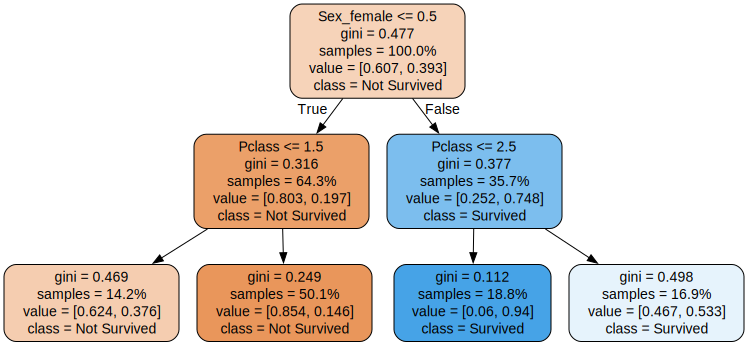

In [5]:
dot_data=tree.export_graphviz(dt,out_file=None,filled=True,rounded=True,feature_names=X.columns,proportion=True,class_names=['Not Survived','Survived'])
graph=graphviz.Source(dot_data)
graph

Mỗi nút (node) trong cây chỉ “nhìn thấy” dữ liệu của riêng mình, và tự chọn ra thuộc tính + ngưỡng chia (threshold) giúp giảm chỉ số hỗn loạn (Gini) nhiều nhất trong phần dữ liệu đó.
# Giải thích tham số :
- gini : độ hỗ loạn ,càng thấp càng tốt
- value = [a,b] , a+b=1 : biểu thị tỉe lệ hoặc số lượng mẫu mỗi lớp trong nút
  Ví dụ : value=[0.607,0.393] -> 60,7% mẫu là "Not Survived" , 39,3% là "Survived"
- samples : dùng khoảng bao nhiêu % dữ liêu tai nut đó
- class : dựa theo phân tích value -> cái nào chiếm đa số -> dự đóán tại nút đó
- max-depth=2: độ sâu tối đa là 2 -> 2 cấp phân nhánh
## Nút gốc (root node)
- Sex_female <= 0.5 -> chọn giới tính yêu tố đầu tiên : <=0.5 -> nam giới
- gini khá cao
- tổng thể 60,7% ko sống ,39,3% sống
- Trong nhóm nam giới,cây tiếp tục chia theo Pclass (hạng vé)
## Nút 1 (hạng vé)
- Pclass <=1.5 -> hạng 1 khác biệt với 2-3  -> có khác biệt nhất + gini giảm nên mới chọn -> được 80% chết và 19.7% sông
- Pclass <=2.5 -> hang 1-2 khác biệt với 3 -> có khác biệt nhất + gini gảm -> 25,2% không sống và 74% sống
## Nút 2 (nhánh con của Nam - Pclass <= 1.5 - True)
- Hạng 1
- 62,4% không sông sot ,37,6% sống sót
- Hạng 2 ,3 chết cực cao 85,4% (Pclass > 1.5)
## Nút 2 (nhanhs con của Nữ - Pclass <=2.5 True  )
- Hạng 1,2
- Tỉ lệ sống cực cao 94% ,
- Hạng 1 tỉ lệ sống 53,3 ,chết là 46,7%

# Bai 2 

In [6]:
df2=pd.read_csv('diabetes_prediction_dataset.csv')
df2.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [18]:
X2=df2.drop('diabetes',axis=1)
X2=df2[['gender','smoking_history']]
X2=pd.get_dummies(X2)
y2=df2['diabetes']

X_train2,X_test2,y_train2,y_test2=train_test_split(X2.values,y2.values,test_size=0.2,random_state=24)

In [16]:
dt2=tree.DecisionTreeClassifier(max_depth=3)
dt2.fit(X_train2,y_train2)

y2.unique()

array([0, 1])

In [17]:
dot_data=tree.export_graphviz(dt2,out_file=None,filled=True,rounded=True,feature_names=X.columns,proportion=True,class_names=['Not Diebete','Diebete'])
graph=graphviz.Source(dot_data)
graph

ValueError: Length of feature_names, 10 does not match number of features, 9